In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_set_train=pd.read_csv("/Users/satyarth/Downloads/train.csv")# here we have imported train data


In [12]:
data_set_test=pd.read_csv("/Users/satyarth/Downloads/mnist_test.csv")

In [16]:
X_test= data_set_test.drop(["label"],axis=1)
Y_test=data_set_test["label"]

In [20]:
X_train=data_set_train.drop(["label"],axis=1)
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
Y_train=data_set_train["label"].values
Y_train

array([1, 0, 1, ..., 7, 6, 9])

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

print(pca.explained_variance_ratio_)

[0.09748938 0.07160266]


Text(0, 0.5, 'Cumulative explained variance')

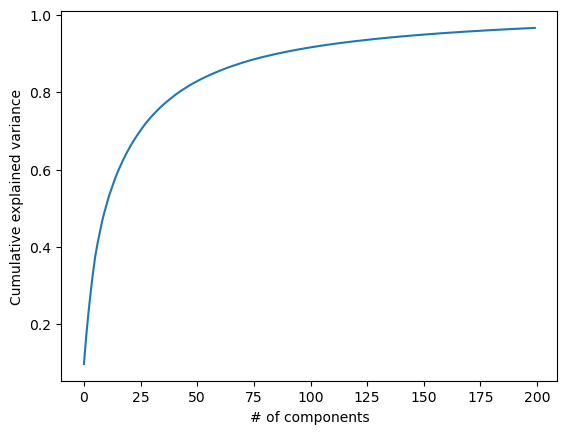

In [22]:
pca = PCA(200)
pca_full = pca.fit(X_train)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')


In [23]:
pca = PCA(n_components=50)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed=pca.fit_transform(X_test)


In [25]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_train_transformed, Y_train, test_size=0.2, random_state=13)


In [26]:
components = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
neighbors = [1, 2, 3, 4, 5, 6, 7]

scores = np.zeros( (components[len(components)-1]+1, neighbors[len(neighbors)-1]+1 ) )

In [27]:
from sklearn.neighbors import KNeighborsClassifier

for component in components:
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_pca[:,:component], y_train_pca)
        score = knn.score(X_test_pca[:,:component], y_test_pca)
        #predict = knn.predict(X_test_pca[:,:component])
        scores[component][n] = score
        
        print('Components = ', component, ', neighbors = ', n,', Score = ', score)   


Components =  5 , neighbors =  1 , Score =  0.6834523809523809
Components =  5 , neighbors =  2 , Score =  0.670952380952381
Components =  5 , neighbors =  3 , Score =  0.7113095238095238
Components =  5 , neighbors =  4 , Score =  0.7233333333333334
Components =  5 , neighbors =  5 , Score =  0.7301190476190477
Components =  5 , neighbors =  6 , Score =  0.7353571428571428
Components =  5 , neighbors =  7 , Score =  0.7394047619047619
Components =  10 , neighbors =  1 , Score =  0.9104761904761904
Components =  10 , neighbors =  2 , Score =  0.905952380952381
Components =  10 , neighbors =  3 , Score =  0.92
Components =  10 , neighbors =  4 , Score =  0.9213095238095238
Components =  10 , neighbors =  5 , Score =  0.9226190476190477
Components =  10 , neighbors =  6 , Score =  0.9220238095238096
Components =  10 , neighbors =  7 , Score =  0.9205952380952381
Components =  15 , neighbors =  1 , Score =  0.9461904761904761
Components =  15 , neighbors =  2 , Score =  0.9423809523809524

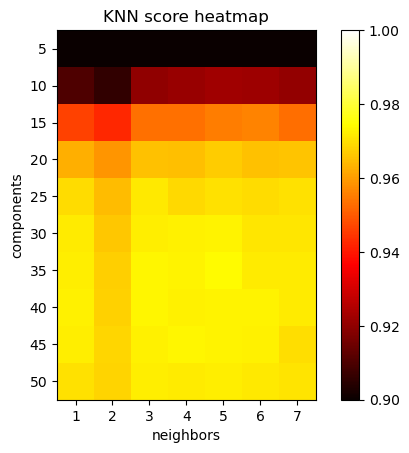

In [28]:
scores = np.reshape(scores[scores != 0], (len(components), len(neighbors)))

x = [0, 1, 2, 3, 4, 5, 6]
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.rcParams["axes.grid"] = False

fig, ax = plt.subplots()
plt.imshow(scores, cmap='hot', interpolation='none', vmin=.90, vmax=1)
plt.xlabel('neighbors')
plt.ylabel('components')
plt.xticks(x, neighbors)
plt.yticks(y, components)
plt.title('KNN score heatmap')

plt.colorbar()
plt.show()# in heat map as no of clusters inceases, accura

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca[:, :35], y_train_pca)

predict_labels = knn.predict(X_test_transformed[:, :35])


In [32]:
predict_labels

array([1, 9, 9, ..., 8, 5, 2])

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print ("Classification Report")
print(classification_report(Y_test,predict_labels))
print ("Confusion Report")
print(confusion_matrix(Y_test, predict_labels))


Classification Report
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       980
           1       0.28      0.16      0.20      1135
           2       0.11      0.13      0.12      1032
           3       0.06      0.07      0.06      1010
           4       0.06      0.05      0.06       982
           5       0.27      0.21      0.24       892
           6       0.12      0.11      0.12       958
           7       0.05      0.04      0.05      1028
           8       0.12      0.18      0.14       974
           9       0.02      0.02      0.02      1009

    accuracy                           0.16     10000
   macro avg       0.19      0.16      0.17     10000
weighted avg       0.18      0.16      0.17     10000

Confusion Report
[[650   0  20  38  13  50 109  23  59  18]
 [  0 182  24   2 170   0  62 375   0 320]
 [ 34   8 139  12 198  31 394  48  70  98]
 [ 18  10   4  66 126 136   8 107 126 409]
 [  7  23 203 218  52  62  95 